## Matplotlib / Seaborn / Plotly

In [1]:
!pip install matplotlib

In [5]:
import matplotlib.pyplot as plt
import numpy as np

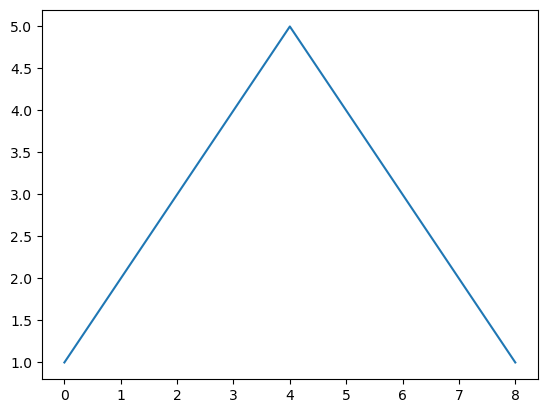

In [6]:
# plot() : 선(라인) 그래프
plt.plot([1,2,3,4,5,4,3,2,1])

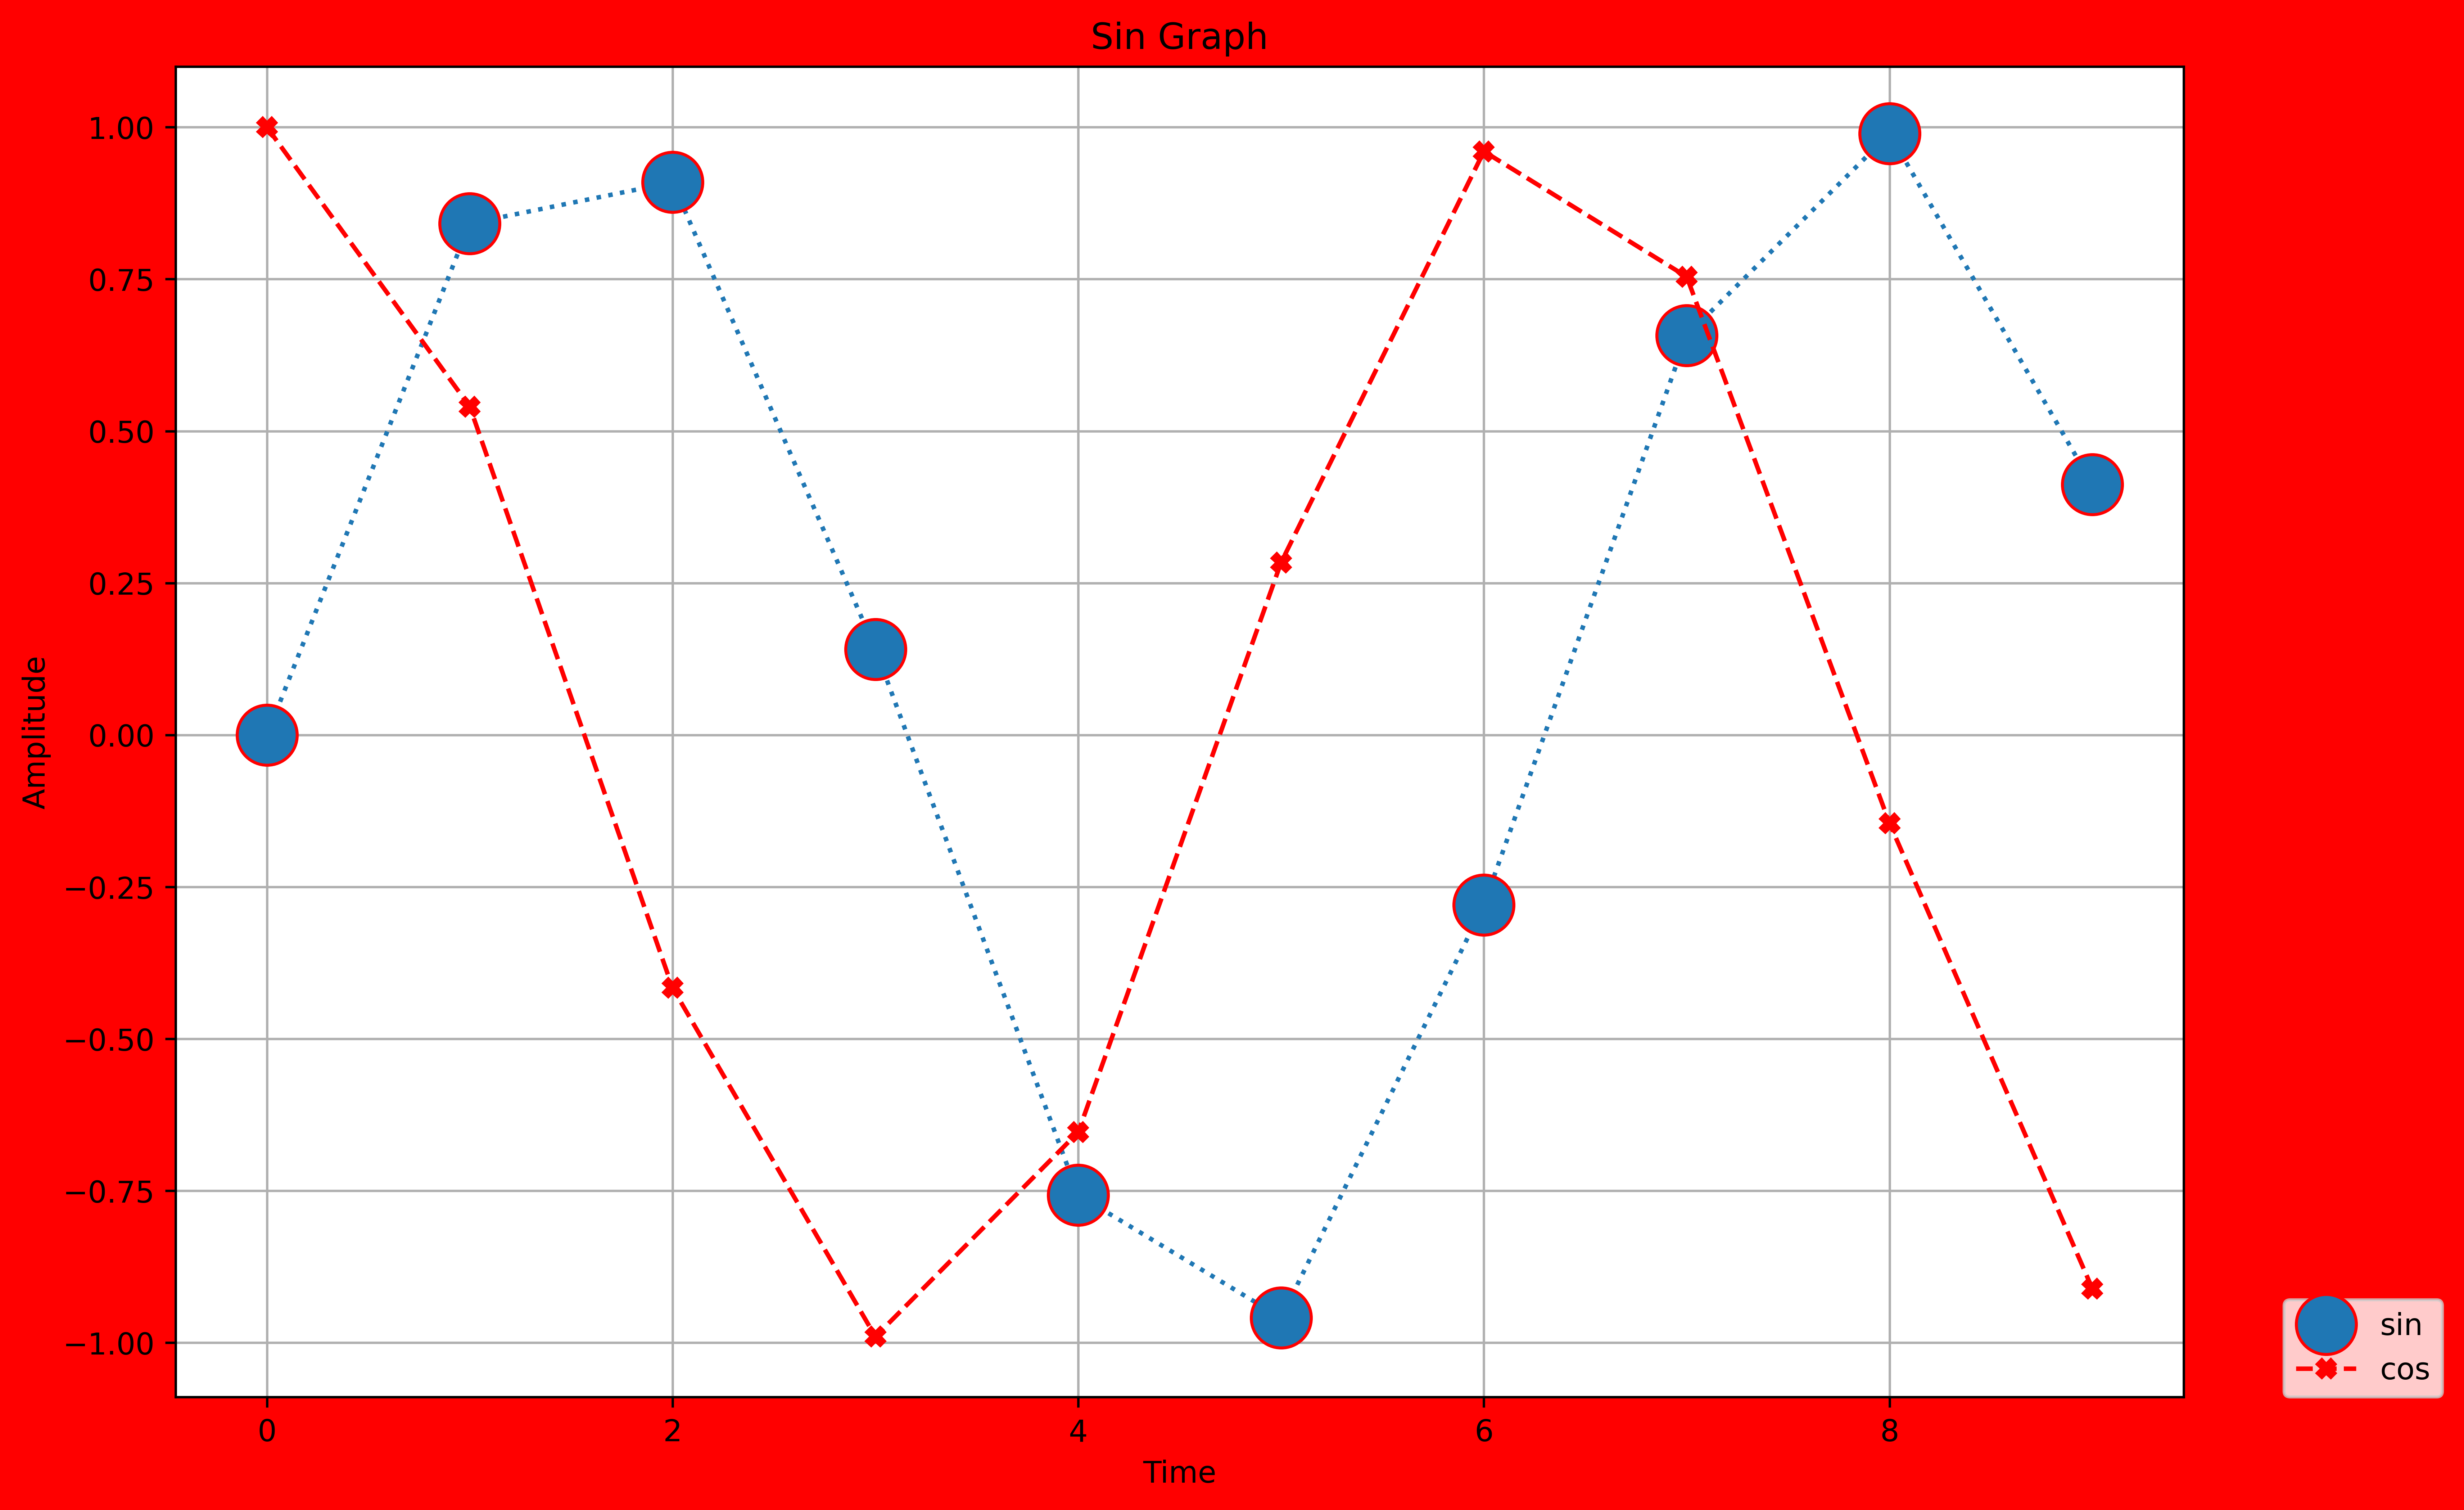

In [39]:
x = np.arange(0, 10, 1)
y = np.sin(x)
y2 = np.cos(x)

# dpi: dots per inch
plt.figure(facecolor='red', figsize=(12,8), dpi=600) # 도화지 옵션

plt.plot(x, y, label='sin', 
         marker='o', markersize=20, markeredgecolor='red', linestyle='dotted')
# plt.plot(x, y2, label='cos', marker='x', linestyle='-.')
plt.plot(x, y2, 'rX--',label='cos') # linecolor, marker, linestyle

plt.legend(loc=(1.05,0))

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Sin Graph")
plt.grid()

<BarContainer object of 10 artists>

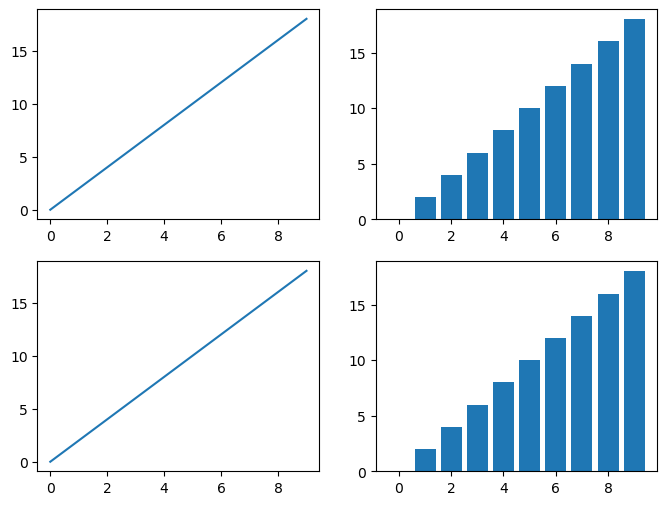

In [48]:
# 그래프를 여러 개를 따로 나타내는 방법 => subplots()
y3 = x * 2
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(8,6))

ax1.plot(x, y3)
ax2.bar(x, y3)
ax3.plot(x, y3)
ax4.bar(x, y3)

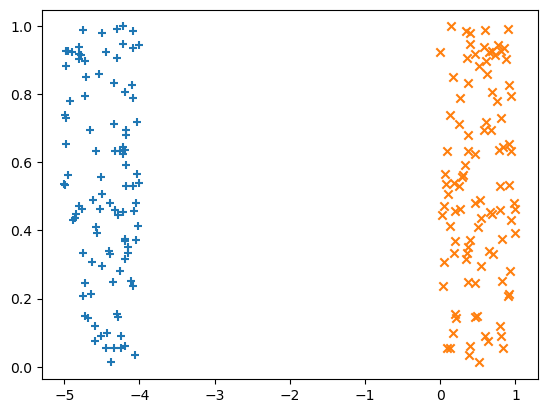

In [53]:
# scatter
# - 데이터들이 어떠한 분포를 하고 있는지. 값들이 어디에 위치해있는지
# - 점들을 좌표에 표시 + x,y 간의 관계를 볼 수 있다.
# - 4분면 => 데이터들이 어떤 식으로 군집화 되어있는지.

x1 = np.random.rand(1, 100) - 5
x2 = np.random.rand(1, 100)
y = np.random.rand(1, 100)

plt.scatter(x1, y, marker='+')
plt.scatter(x2, y, marker='x')

In [55]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/KNN_data.csv')
df # iris

,x,y,Label
0,5.539907,2.780370,Medium
1,5.309798,3.342864,Large
2,4.367271,4.551839,Large
3,3.812863,2.447711,Large
4,5.213783,5.133856,Large
...,...,...,...
95,-10.973173,-6.348612,Small
96,-12.787083,-5.901621,Small
97,-12.365544,-7.557758,Small
98,-12.201273,-9.228887,Small


In [57]:
# Label의 종류에 따라서 scatter 그래프를 그리시오.
df['Label'].value_counts()
df
# plt.scatter(x, y)

,x,y,Label
0,5.539907,2.780370,Medium
1,5.309798,3.342864,Large
2,4.367271,4.551839,Large
3,3.812863,2.447711,Large
4,5.213783,5.133856,Large
...,...,...,...
95,-10.973173,-6.348612,Small
96,-12.787083,-5.901621,Small
97,-12.365544,-7.557758,Small
98,-12.201273,-9.228887,Small


<AxesSubplot:xlabel='x', ylabel='y'>

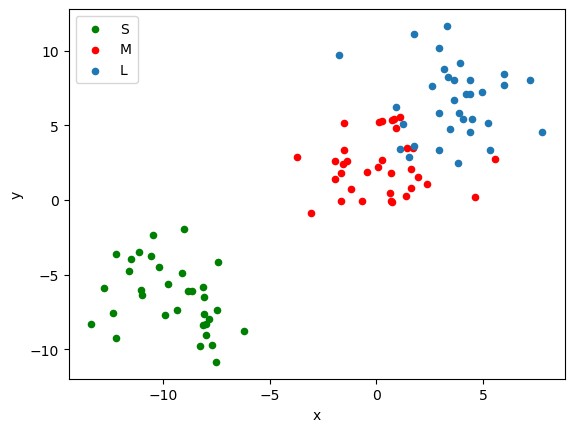

In [75]:
df_small = df[df['Label'] == 'Small']
df_medium = df[df['Label'] == 'Medium']
df_large = df[df['Label'] == 'Large']

# plt.scatter(df_small['x'], df_small['y'], label='small')
# plt.scatter(df_medium['x'], df_medium['y'], label='medium')
# plt.scatter(df_large['x'], df_large['y'], label='large')

# plt.scatter(data=df_small, x='x', y='y')
# plt.scatter(data=df_medium, x='x', y='y')
# plt.scatter(data=df_large, x='x', y='y')

# plt.scatter('x', 'y', data=df_small)
# plt.scatter('x', 'y', data=df_medium)
# plt.scatter('x', 'y', data=df_large)

ax = df_small.plot(x='x', y='y', kind='scatter', label='S', color='g')
df_medium.plot(x='x', y='y', kind='scatter', label='M', ax=ax, color='r')
df_large.plot(x='x', y='y', kind='scatter', label='L', ax=ax)

<BarContainer object of 3 artists>

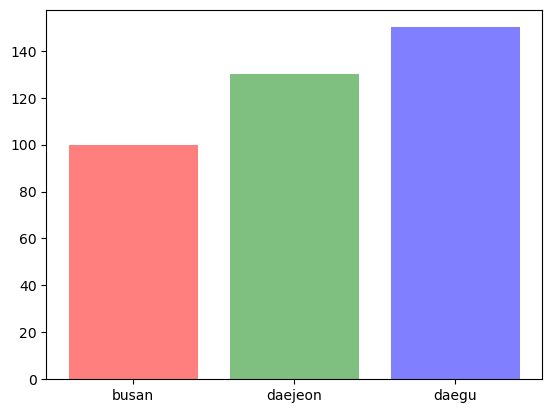

In [79]:
# bar chart
values = [100, 130, 150]
labels = ['busan', 'daejeon', 'daegu']
colors = ['r', 'g', 'b']

plt.bar(labels, values, color=colors, alpha=0.5)

(90.0, 160.0)

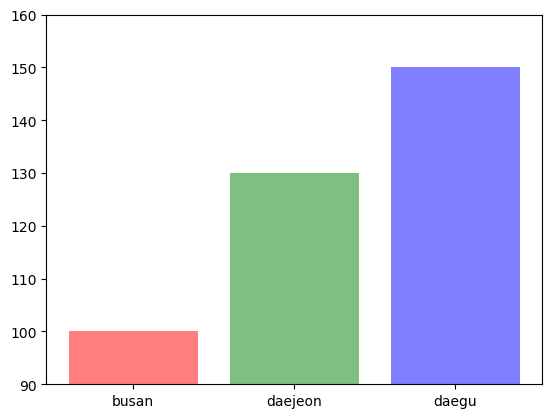

In [82]:
values = [100, 130, 150]
labels = ['busan', 'daejeon', 'daegu']
colors = ['r', 'g', 'b']

plt.bar(labels, values, color=colors, alpha=0.5)
plt.ylim(90, 160)

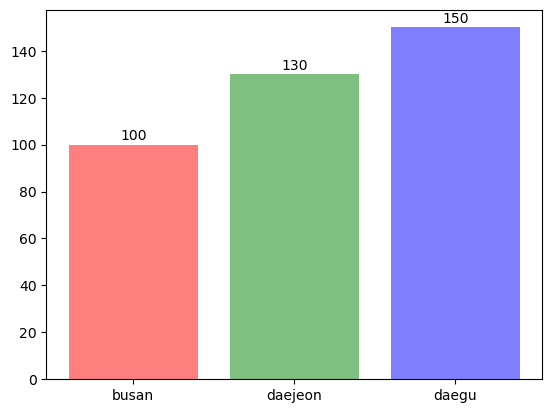

In [90]:
fig, ax = plt.subplots()
ax.bar(labels, values, color=colors, alpha=0.5)

for index, value in enumerate(values):
    ax.text(index, value+2, str(value), ha='center')

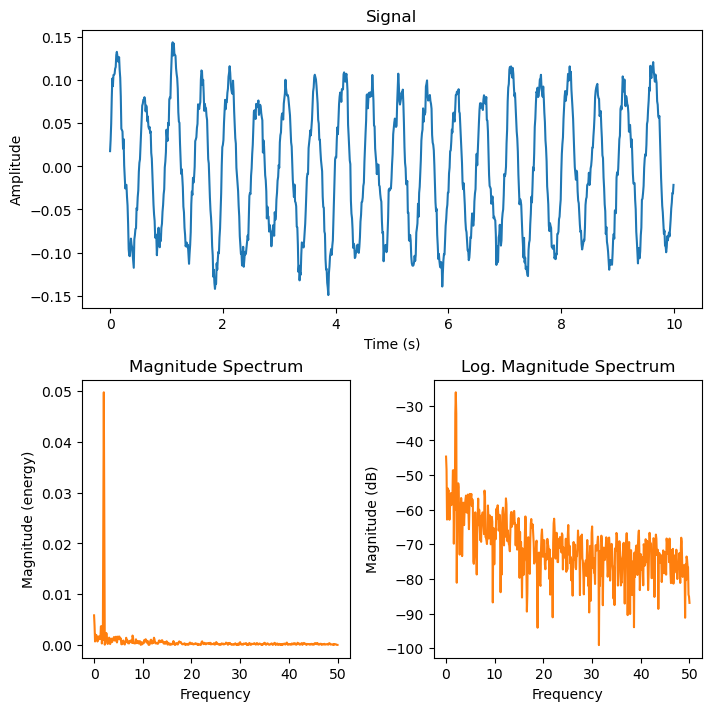

In [93]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([["signal", "signal"],
                          ["magnitude", "log_magnitude"]])

# plot time signal:
axs["signal"].set_title("Signal")
axs["signal"].plot(t, s, color='C0')
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")

# plot different spectrum types:
axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(s, Fs=Fs, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

plt.show()

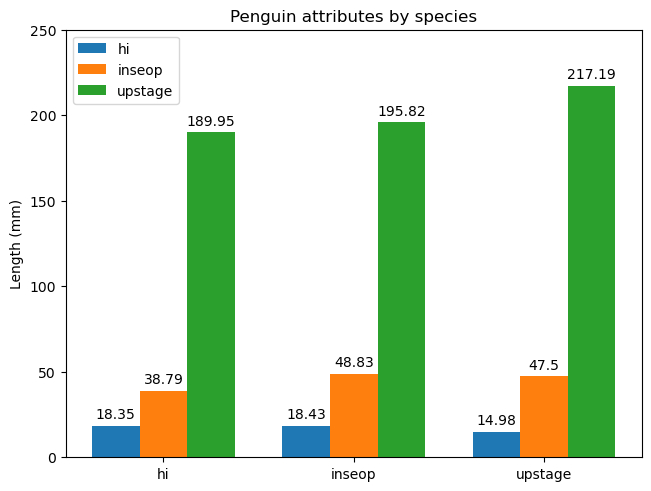

In [96]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("hi", "inseop", "upstage")
penguin_means = {
    'hi': (18.35, 18.43, 14.98),
    'inseop': (38.79, 48.83, 47.50),
    'upstage': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 250)

plt.show()

## Seaborn

In [97]:
!pip install seaborn

In [98]:
import seaborn as sns

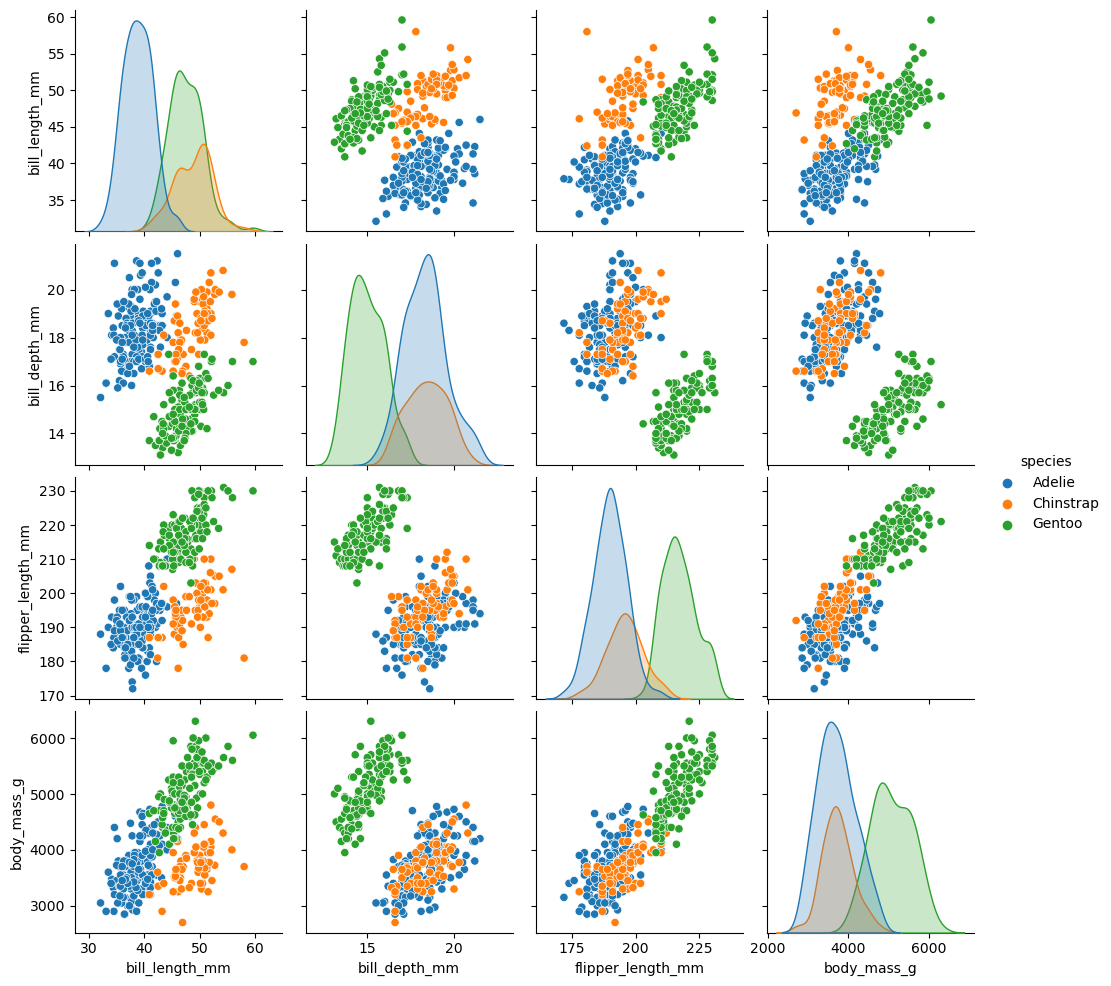

In [99]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [105]:
df = sns.load_dataset('tips')
df

# total_bill: 전체 계산 금액
# tip: 팁 데이터

# 한 대학생이 알바 자리를 구하려고 합니다. => 팁을 많이 받으면 좋겠죠?
# 사장님에게 데이터를 제공받았습니다. 
# 여러분이라면 언제 일을 하시겠습니까? 낮, 저녁? 언제 일했을때 가장 많은 팁을 받을 수 있을까요?
# 성별, 흡연여부 => 누구에게 서빙을 할 것인가? 그룹이 많은사람? 적은사람?

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [108]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:ylabel='tip'>

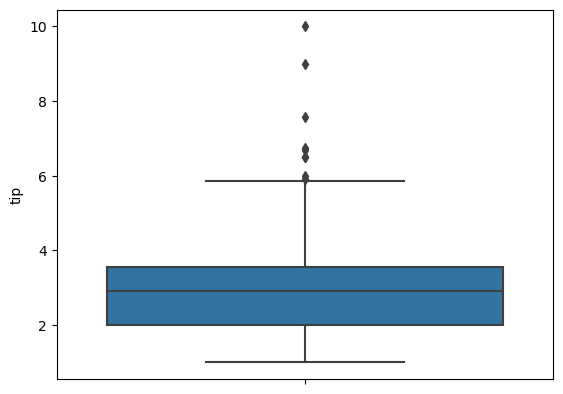

In [109]:
sns.boxplot(y=df['tip'])

<AxesSubplot:xlabel='day', ylabel='tip'>

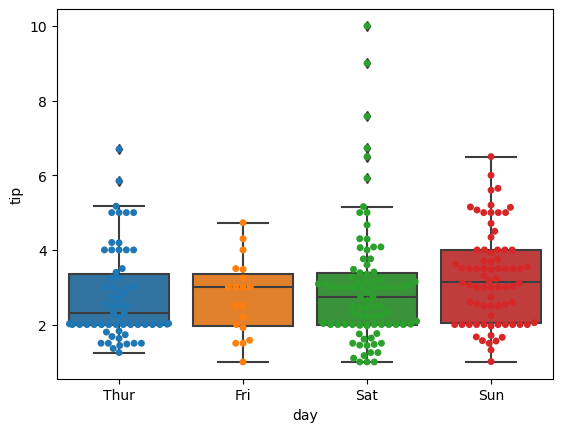

In [116]:
# 요일별 팁 데이터 boxplot
# sns.boxplot(data=df, x='day', y='tip', hue='sex')
# sns.boxplot(data=df, x='day', y='tip', hue='smoker')

sns.boxplot(data=df, x='day', y='tip')
sns.swarmplot(data=df, x='day', y='tip')

In [120]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


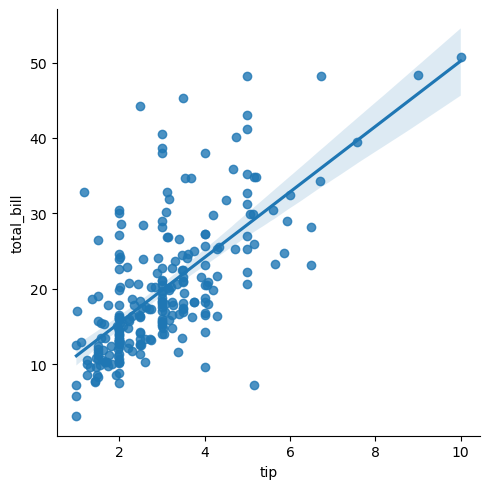

In [121]:
sns.lmplot(data=df, x='tip', y='total_bill')

In [123]:
# 기울기와 절편
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

# 절편 방정식
m, b = np.polyfit(x, y, 1) # m: 기울기, b: 절편
m, b

(1.9999999999999996, 3.9720546451956367e-16)

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


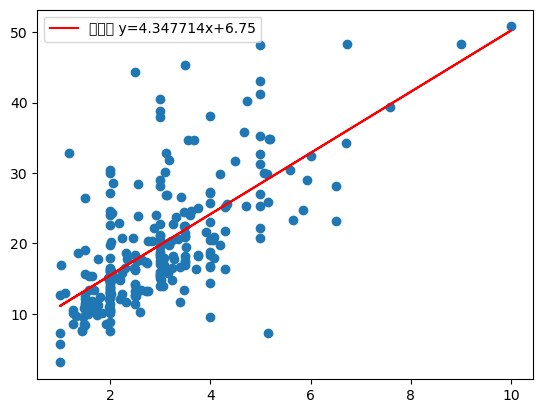

In [126]:
x = df['tip']
y = df['total_bill']

m , b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m * x + b, color='r', label=f'회귀선 y={m:2f}x+{b:.2f}')

<AxesSubplot:xlabel='year', ylabel='month'>

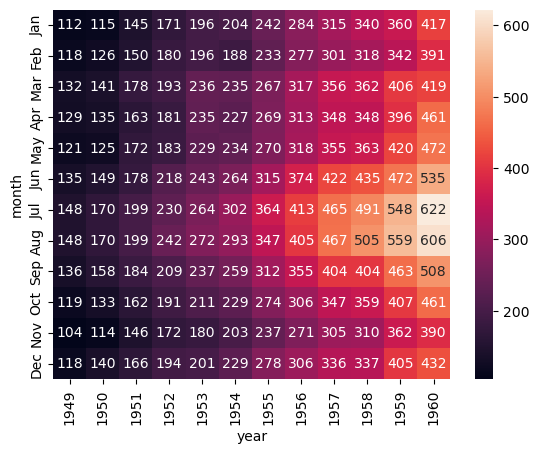

In [135]:
# 시계열 데이터: 날씨, 주식, 부동산.
df = sns.load_dataset('flights')

df_pivot = df.pivot(index='month', columns='year', values='passengers')
sns.heatmap(df_pivot, annot=True, fmt='d')

## 타이타닉 시각화

In [136]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


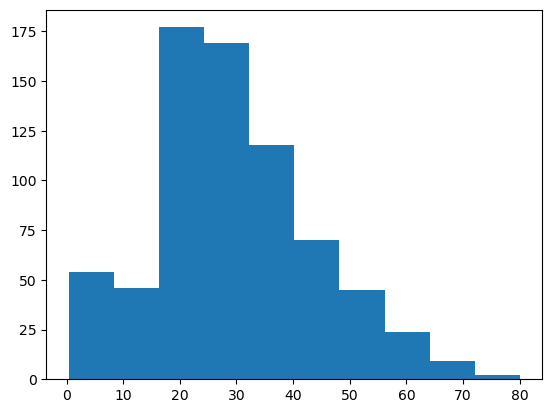

In [139]:
# Age - 데이터의 분포를 볼 때는 histogram
plt.hist(df['Age'])
plt.show()

<AxesSubplot:>

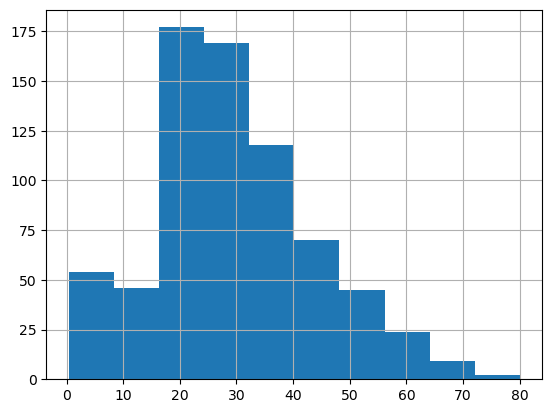

In [140]:
df['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

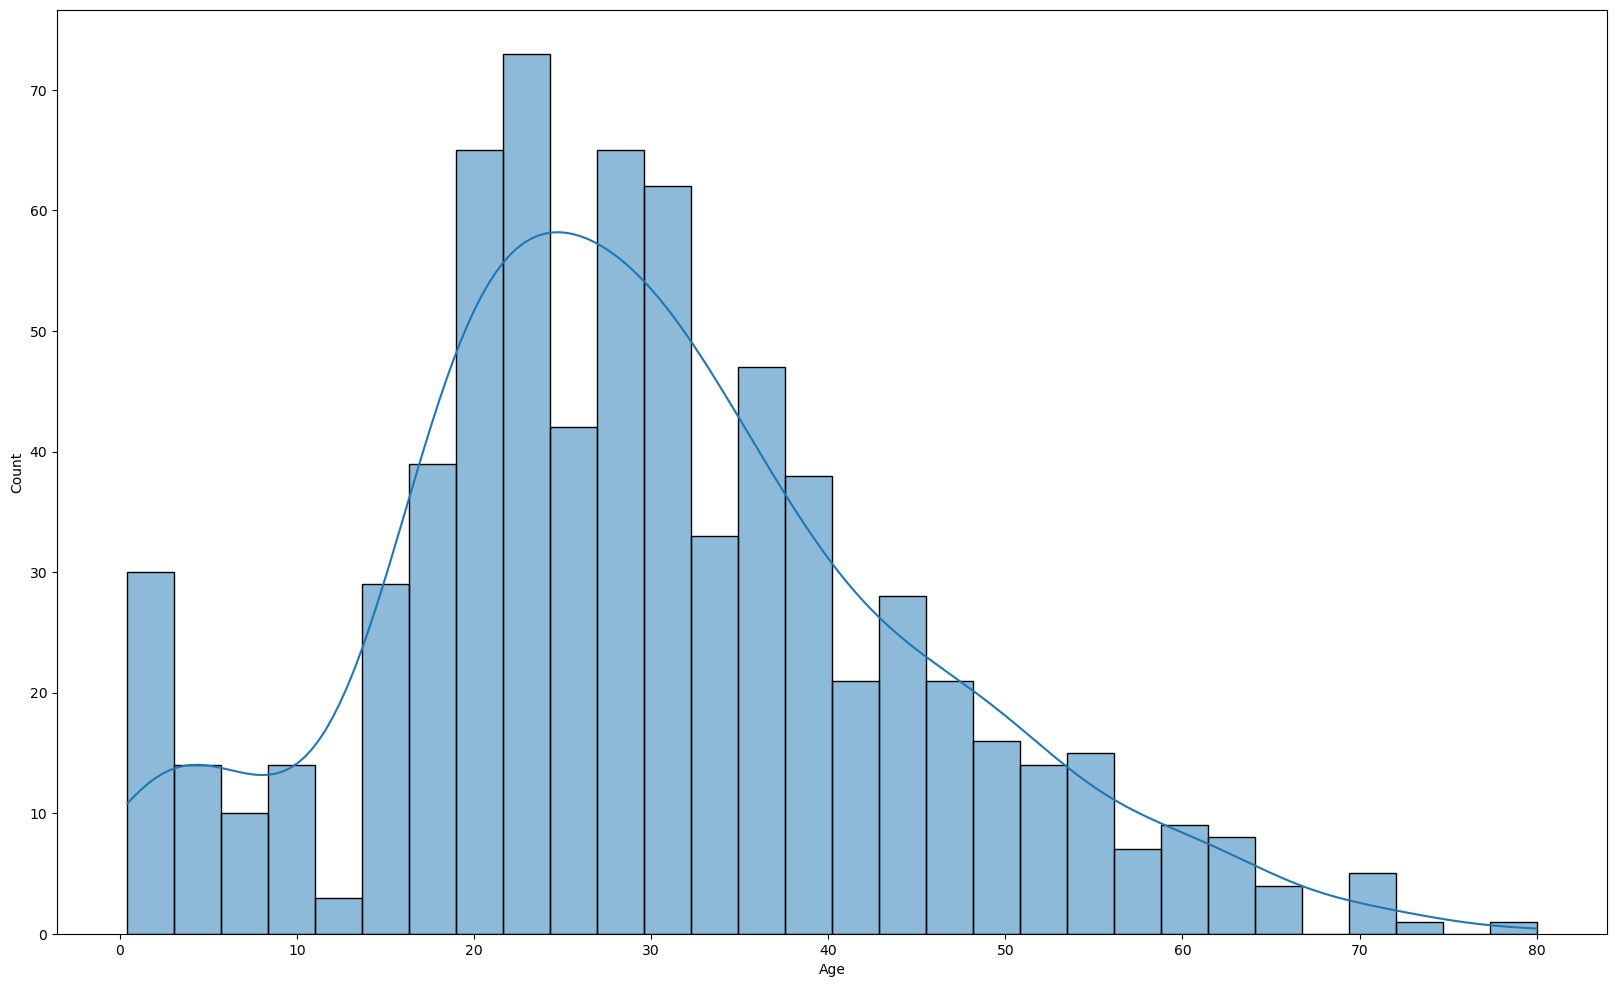

In [149]:
plt.figure(figsize=(20,12))
sns.histplot(data=df['Age'], bins=30, kde=True)

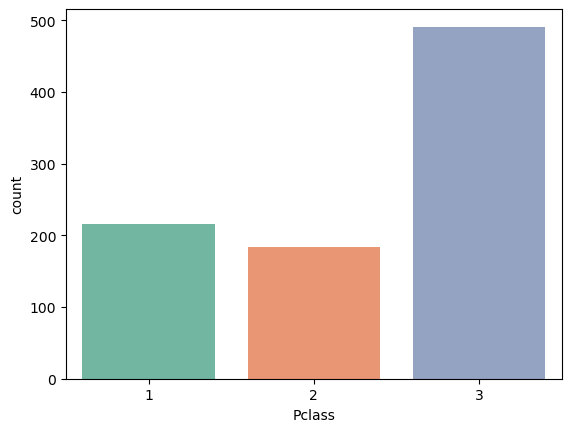

In [161]:
df['Pclass'].value_counts()
sns.countplot(data=df, x='Pclass', palette="Set2")
plt.show()

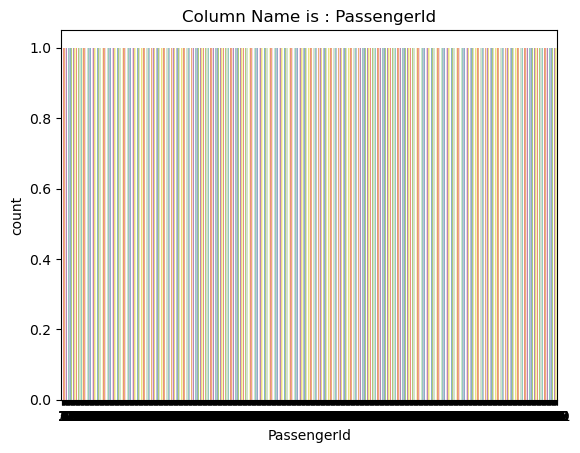

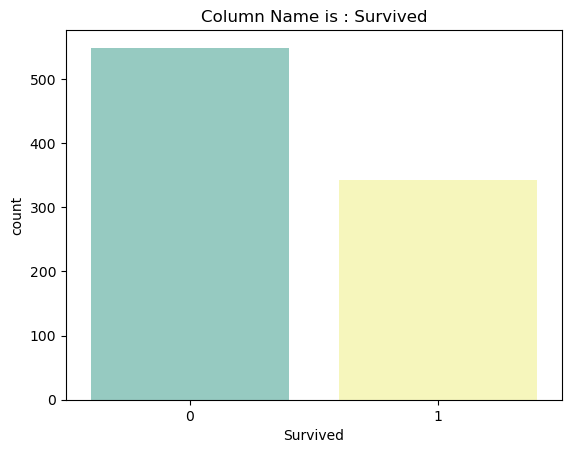

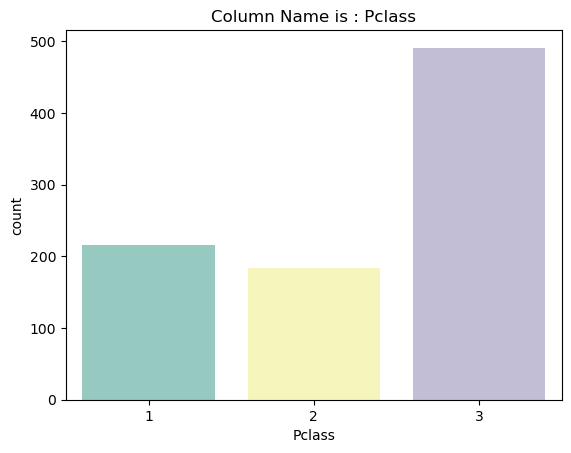

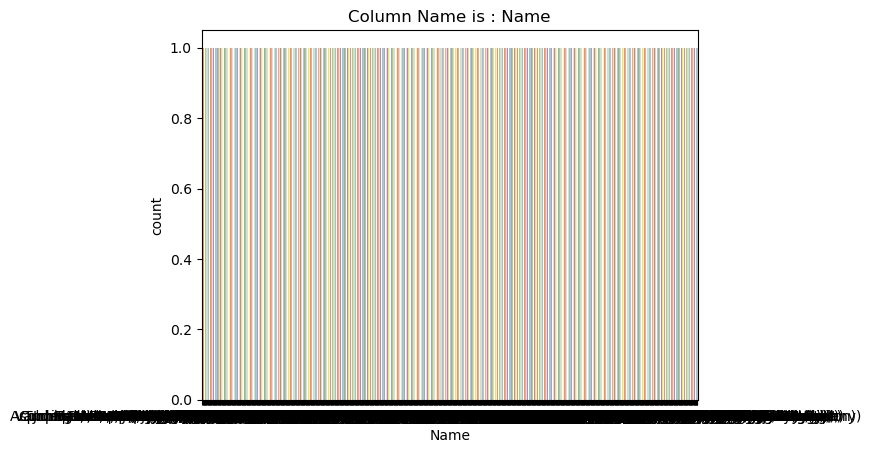

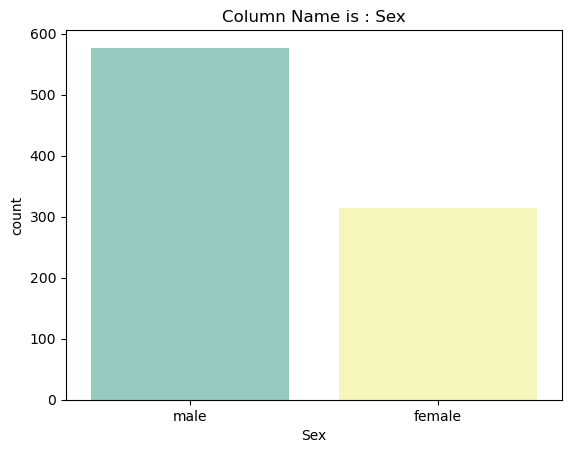

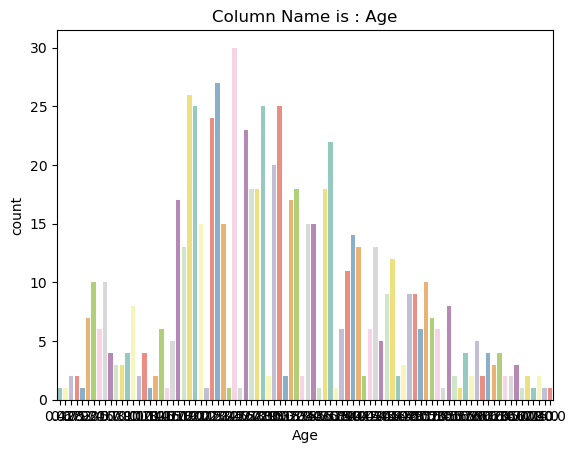

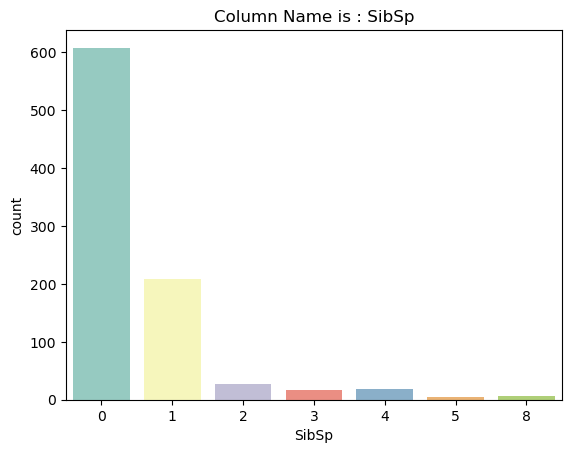

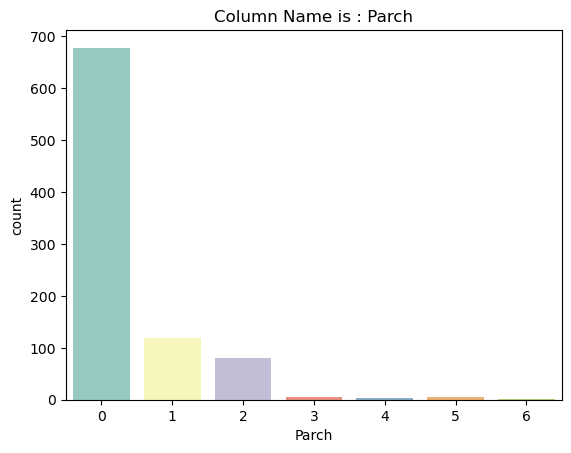

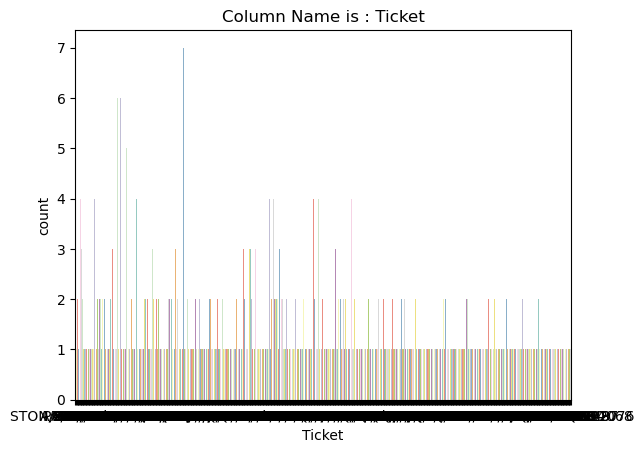

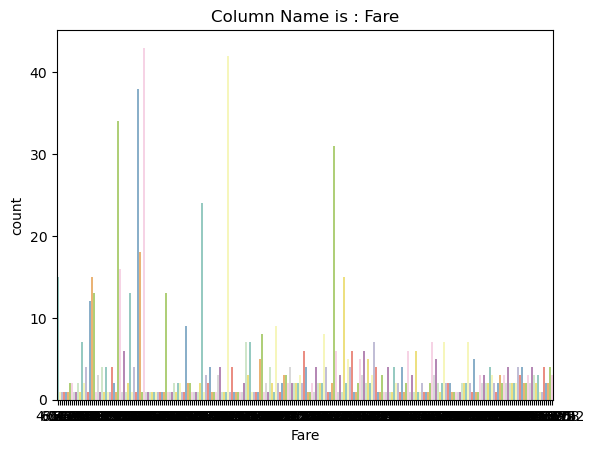

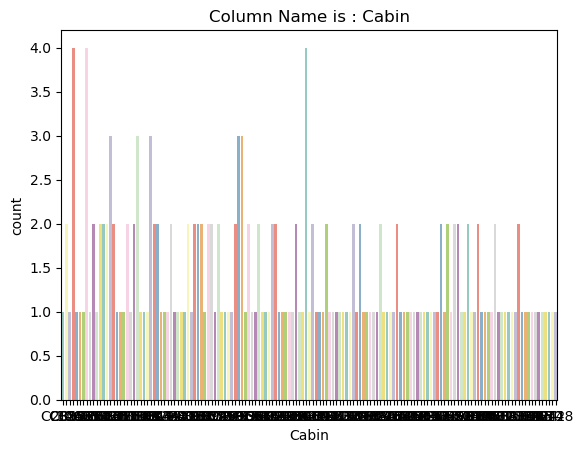

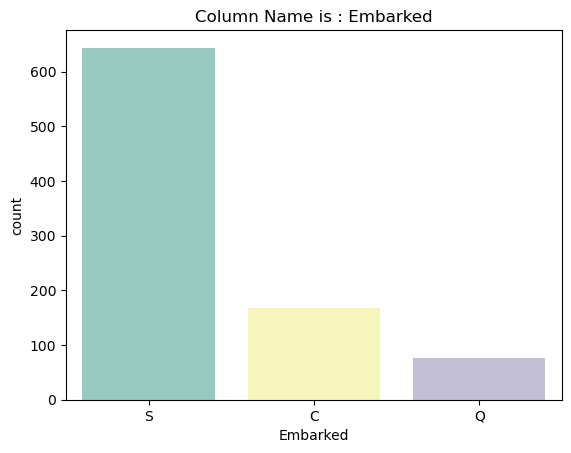

In [163]:
for col in df.columns:
    sns.countplot(data=df, x=col, palette="Set3")
    plt.title(f"Column Name is : {col}")
    plt.show()

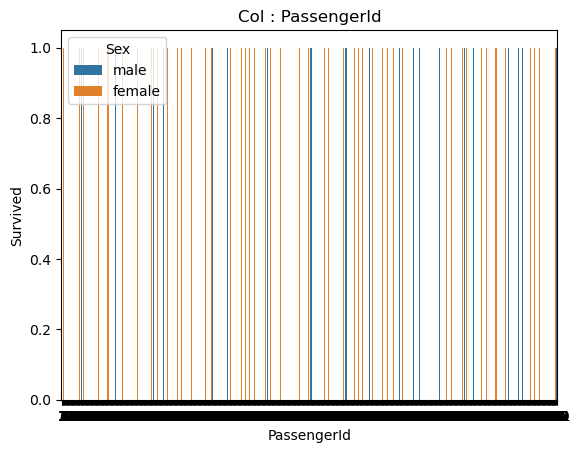

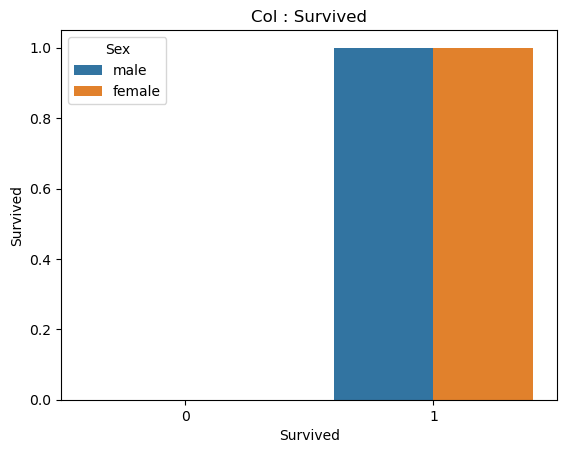

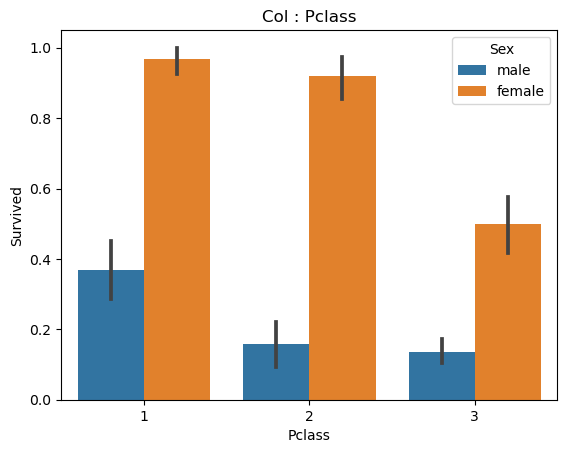

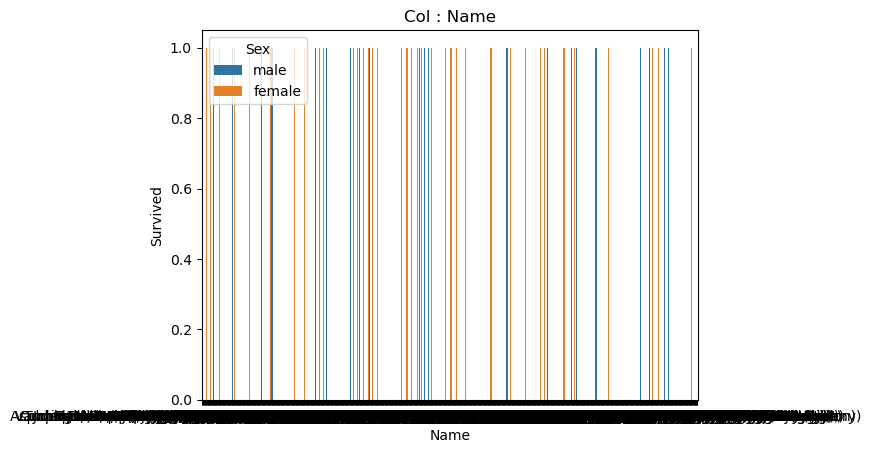

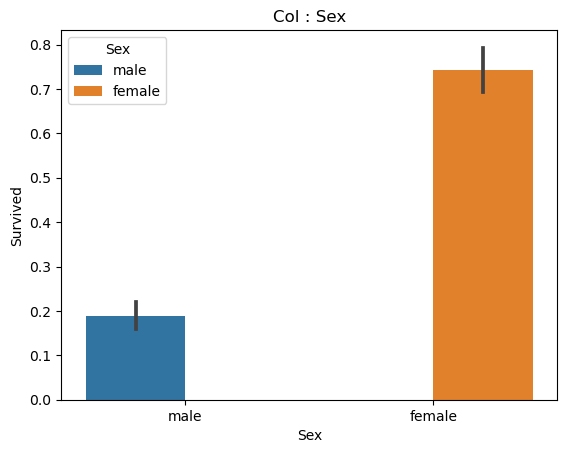

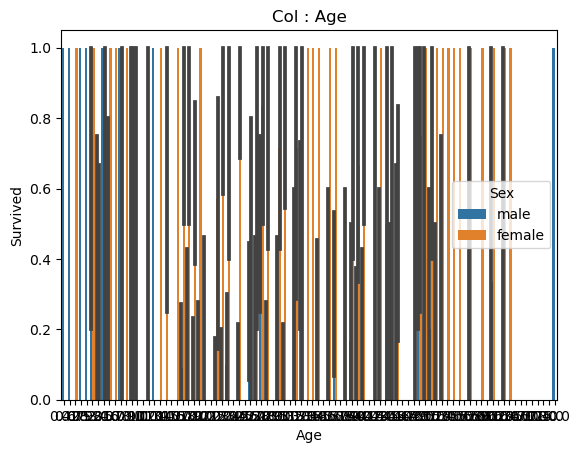

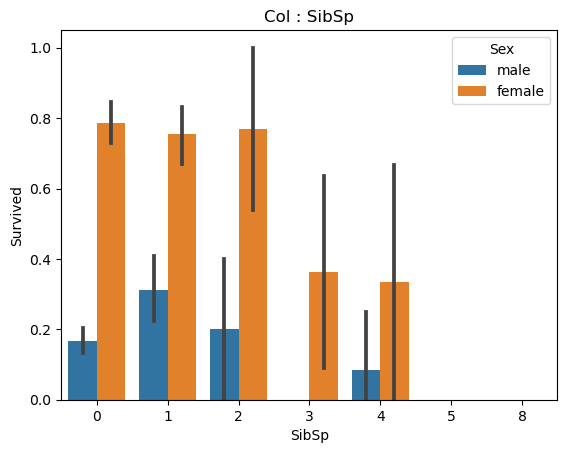

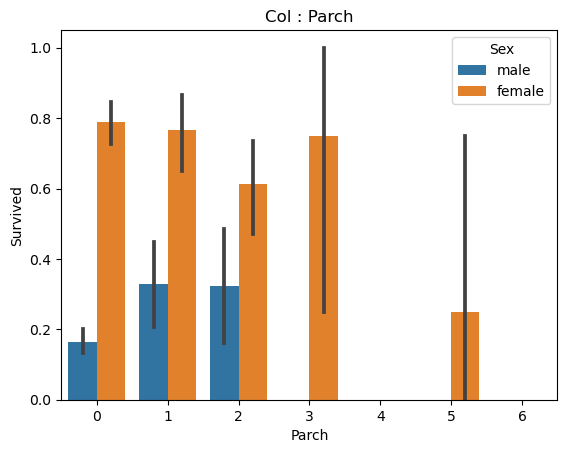

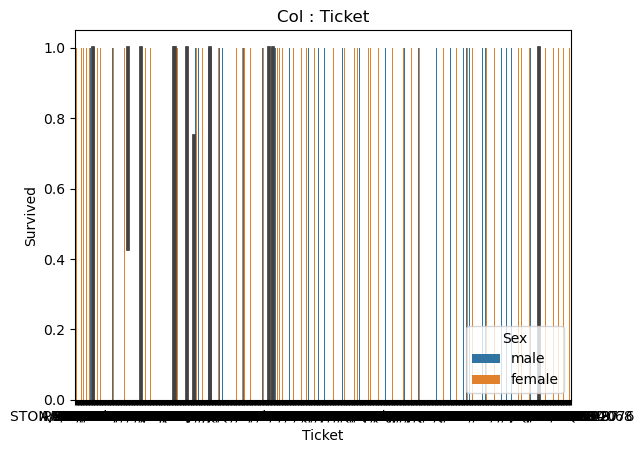

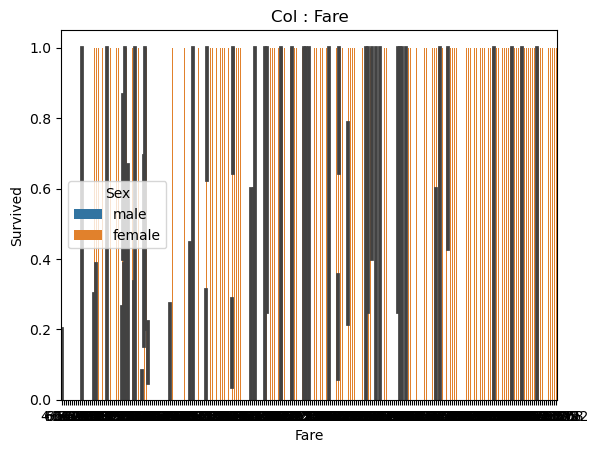

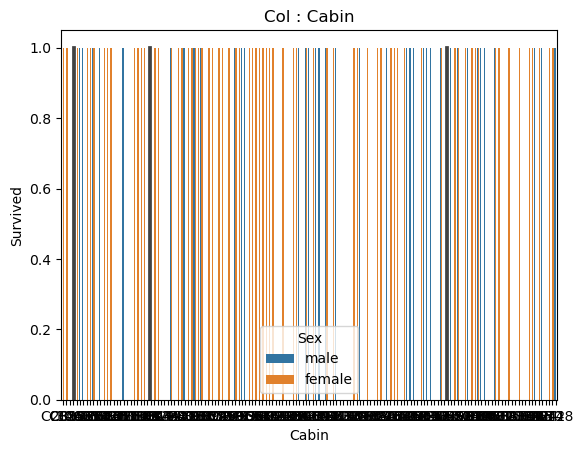

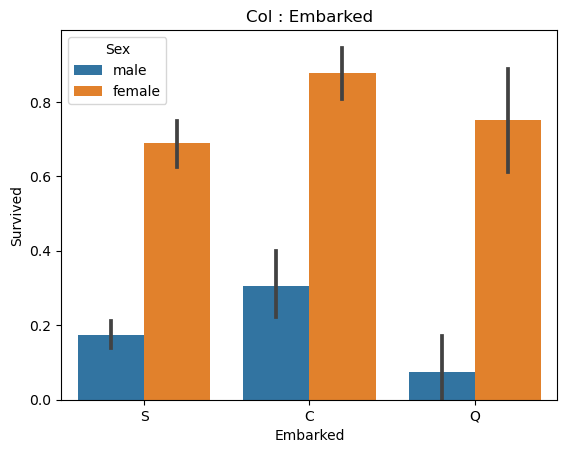

In [170]:
# sns.barplot(data=df, x='Embarked', y='Survived')
df = pd.read_csv()
label = 'Survived'

for col in df.columns:
    sns.barplot(data=df, x=col, y=label, hue='Sex')
    plt.title("Col : " + col)
    plt.show()

In [171]:
def age_group(age):
    if age <= 10: group='baby'
    elif age <= 20: group='student'
    elif age <= 35: group='young adult'    
    elif age <= 60: group='adult'
    else: group='senior'
        
    return group

<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

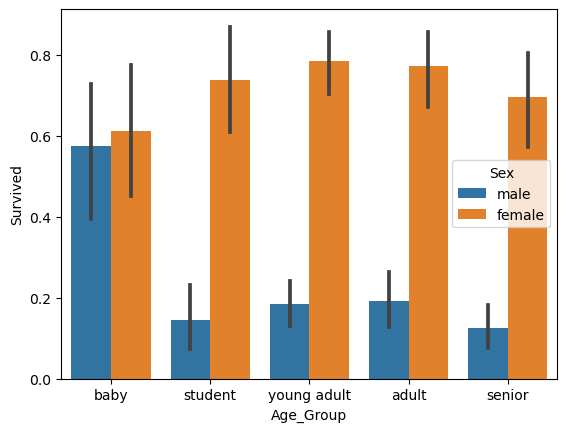

In [183]:
df['Age_Group'] = df['Age'].apply(age_group)

orders = ['baby', 'student', 'young adult', 'adult', 'senior']
sns.barplot(data=df, x='Age_Group', y='Survived', order=orders, hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

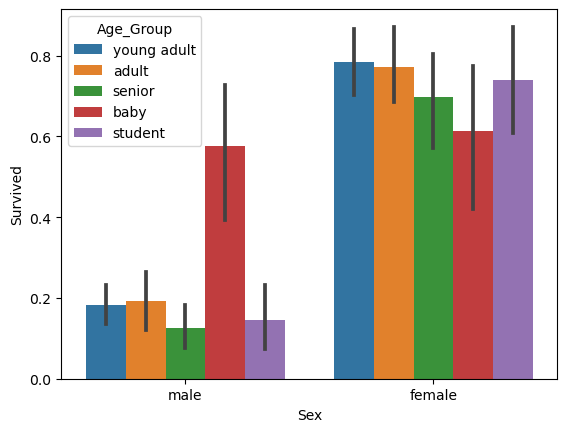

In [185]:
# 여성과 남성 각각에 대한 나이 그룹을 보고 싶어요.
sns.barplot(data=df, x='Sex', y='Survived', hue='Age_Group')

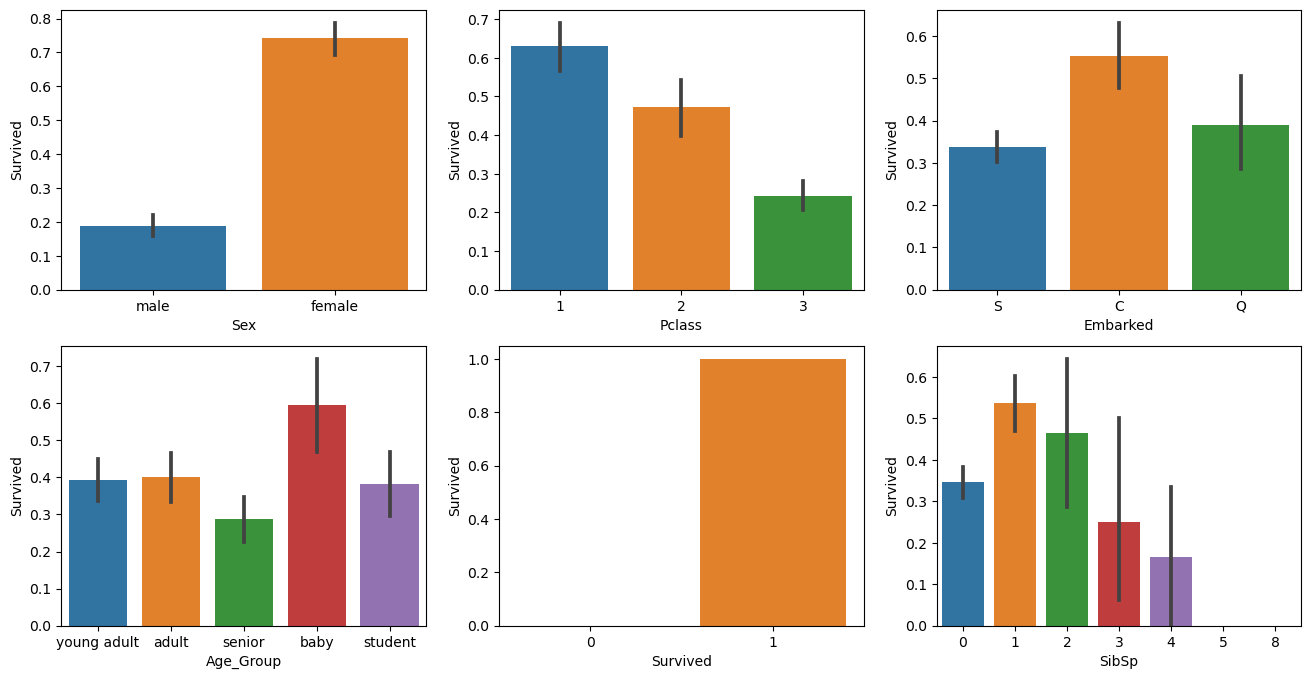

In [197]:
# subplots
columns = ['Sex', 'Pclass', 'Embarked', 'Age_Group', 'Survived', 'SibSp']

# fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(16,8))
# fig, ((ax1, ax2, ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
# ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

for index, col in enumerate(columns):
    sns.barplot(data=df, x=col, y='Survived', ax=ax[index // 3, index % 3])

## 서울시 인구 현황 데이터

In [208]:
df = pd.read_excel('seoul_popular.xlsx', header=2, usecols="B, D, G, J, N")

df.columns = ['구', '전체인구', '한국인', '외국인', '인구밀도']

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [228]:
# df = df.drop(0)

# df.reset_index()
# df.drop(columns='index')

# df.index = df.index - 1

# 한국인비율, 외국인비율
# df.sort_values(by='외국인', ascending=False)

df['외국인비율'] = round((df['외국인'] / df['전체인구']) * 100, 1)
df.sort_values(by='외국인비율', ascending=False)

,구,전체인구,한국인,외국인,인구밀도,외국인비율
1,중구,132054,121441,10613,25546,8.0
0,종로구,151349,140397,10952,28383,7.2
2,용산구,232069,217288,14781,39717,6.4
18,영등포구,398842,376139,22703,66362,5.7
17,금천구,242567,229235,13332,44242,5.5
16,구로구,417774,394833,22941,78150,5.5
5,동대문구,355667,338115,17552,65657,4.9
12,서대문구,321726,308122,13604,57179,4.2
4,광진구,350820,336169,14651,55418,4.2
20,관악구,502430,487192,15238,83932,3.0


In [229]:
df['한국인비율'] = round((df['한국인'] / df['전체인구']) * 100, 1)
df.sort_values(by='한국인비율', ascending=False)

,구,전체인구,한국인,외국인,인구밀도,외국인비율,한국인비율
14,양천구,441517,438353,3164,74386,0.7,99.3
9,도봉구,311386,308986,2400,68682,0.8,99.2
24,강동구,463005,458953,4052,80589,0.9,99.1
23,송파구,662872,657101,5771,106281,0.9,99.1
10,노원구,504641,500104,4537,94102,0.9,99.1
11,은평구,467295,463298,3997,91395,0.9,99.1
22,강남구,542327,537139,5188,84271,1.0,99.0
21,서초구,408753,404484,4269,63822,1.0,99.0
15,강서구,572382,566839,5543,99690,1.0,99.0
6,중랑구,389316,384272,5044,76968,1.3,98.7


In [234]:
df_high_popular = df.sort_values(by='한국인', ascending=False).head(10)

<AxesSubplot:xlabel='구', ylabel='한국인'>

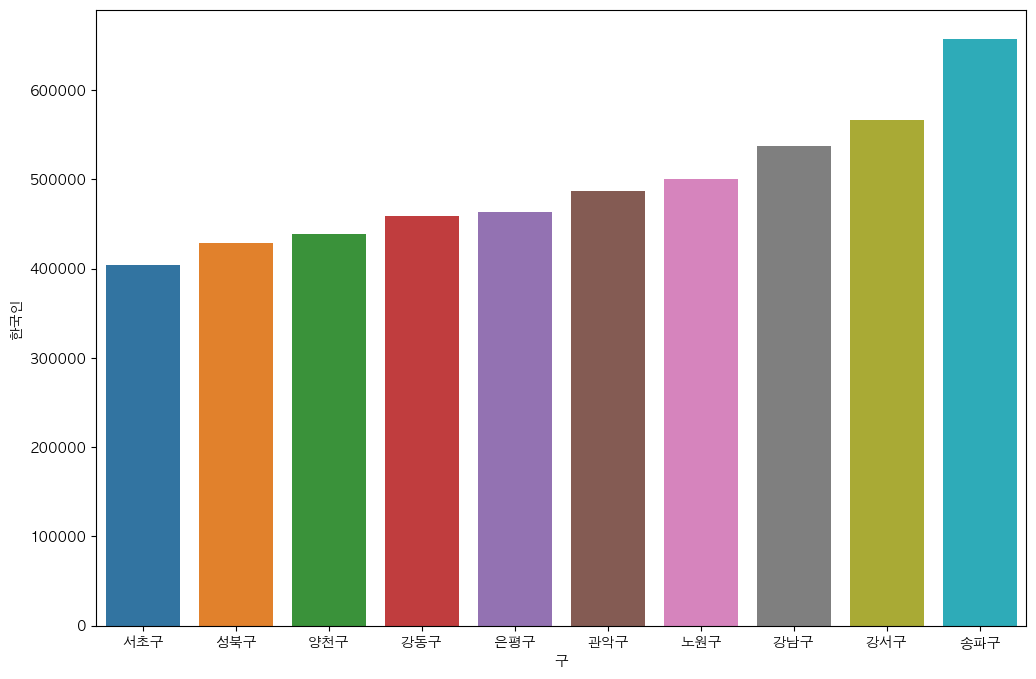

In [251]:
# 한국인 인구 순으로 top10 데이터를 막대 그래프로 시각화 하시오.
# (1) matplotlib
df_high_popular

# plt.rc('font', family='NanumBarunGothic')
# plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic')

# plt.bar(df_high_popular['구'], df_high_popular['한국인']) # x, y
# plt.barh(df_high_popular['구'], df_high_popular['한국인']) # x, y


# (2) seaborn
plt.figure(figsize=(12,8))
sns.barplot(data=df_high_popular.sort_values(by='한국인'), x='구', y='한국인')
sns.barplot(data=df_high_popular[::-1], x='구', y='한국인')

## 부동산 데이터

In [265]:
df1 = pd.read_excel('2013.xlsx') # 2013년 12월~2015년 8월
df2 = pd.read_excel('2019.xlsx') # 2015년 10월~2019년 12월

In [278]:
df2['분양가격(㎡)'].isna().sum()
df2['분양가격(㎡)'] = pd.to_numeric(df2['분양가격(㎡)'], errors='coerce')

In [280]:
df2['분양가격(㎡)'] * 3.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4033 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


In [282]:
df1

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [284]:
df2['분양가격'] = df2['분양가격(㎡)'] * 3.3
df2

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN


In [289]:
# df2['규모구분'].str.replace()

word = '전용면적 60㎡초과 85㎡이하'
word = word.replace("전용면적", "")
word = word.replace("이하", "")
word = word.replace("초과", "~")
word = word.replace(" ", "")
word = word.replace("㎡", "")
word

'60~85'

In [290]:
def str_parser(word):
    word = word.replace("전용면적", "")
    word = word.replace("이하", "")
    word = word.replace("초과", "~")
    word = word.replace(" ", "")
    word = word.replace("㎡", "")
    
    return word

In [297]:
df2['규모구분'] = df2['규모구분'].apply(str_parser)
df2 = df2.drop(columns='분양가격(㎡)')

KeyError: "['분양가격(㎡)'] not found in axis"

In [302]:
df2_all = df2[df2['규모구분'] == '전체']
df2_all = df2_all.drop(columns='규모구분')
df2_all

,지역명,연도,월,분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [308]:
df1 = df1.melt(id_vars='지역', var_name='기간', value_name='분양가격')

,지역,기간,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [311]:
# df1['기간'].str.split('년', expand=True)
df1['기간']

0      2013년12월
1      2013년12월
2      2013년12월
3      2013년12월
4      2013년12월
         ...   
352     2015년8월
353     2015년8월
354     2015년8월
355     2015년8월
356     2015년8월
Name: 기간, Length: 357, dtype: object

In [313]:
date = '2013년12월'

year = date.split('년')[0]
month = date.split('년')[1].replace("월", "")

year, month

('2013', '12')

In [314]:
def make_year(date):
    year = date.split('년')[0]
    return year

def make_month(date):
    month = date.split('년')[1].replace("월", "")
    return month

In [320]:
df1['연도'] = df1['기간'].apply(make_year)
df1['월'] = df1['기간'].apply(make_month)

In [322]:
df1 = df1.drop(columns='기간')
df1

,지역,분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [326]:
df2_all.columns = ['지역', '연도', '월', '분양가격']

In [327]:
df2_all

,지역,연도,월,분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [336]:
df = pd.concat([df1, df2_all])
df

,지역,분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
4310,전북,8144.4,2019,12
4315,전남,8091.6,2019,12
4320,경북,9616.2,2019,12
4325,경남,10107.9,2019,12
